<a href="https://colab.research.google.com/github/GustGon/I.A.Python/blob/master/neural-network/nn-recurrent/Analise_Sentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importação das libs

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
# TensorFlow e tf.keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import nltk
nltk.download("popular")
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [0]:
import re
def remove_href(text):
  return re.sub(r"http\S+", "", text)

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)  

def removerAcentosECaracteresEspeciais(palavra):

    # Unicode normalize transforma um caracter em seu equivalente em latin.
    nfkd = unicodedata.normalize('NFKD', palavra)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    return re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)

In [0]:
#Carregar dataset
dataset = pd.read_csv('/content/drive/My Drive/data-set/imdb-reviews-pt-br.csv',encoding='utf-8')
dataset.count()

id           49459
text_en      49459
text_pt      49459
sentiment    49459
dtype: int64

In [0]:
dataset.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [0]:
df_pt = dataset[['text_pt', 'sentiment']]
df_pt.head()

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Filmes de fotos de latão não é uma palavra apr...,neg


.apply executa uma função iterativamente em todos os elementos do data frame

In [0]:
df_pt.text_pt = df_pt.text_pt.apply( remove_href ).apply( remove_emoji )

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Aplicação da tecnica de remoçao de Stop Words.

In [0]:
stop_words = nltk.corpus.stopwords.words('portuguese')
new_stop_words = [',', '.', '...', '-']
stop_words.extend(new_stop_words)
df_pt.text_pt = df_pt.text_pt.apply( lambda x:' '.join( [item for item in x.split() if item not in stop_words] ) )
### ' '.join mantem o dataframe como string e nao como uma lista que da o erro  de 'list' object has no attribute 'lower' quando vai dar o fit_transform
print(stop_words)
df_pt.head()

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,text_pt,sentiment
0,"Mais vez, Sr. Costner arrumou filme tempo nece...",neg
1,Este exemplo motivo maioria filmes ação mesmos...,neg
2,"Primeiro tudo odeio raps imbecis, poderiam agi...",neg
3,Nem Beatles puderam escrever músicas todos gos...,neg
4,"Filmes fotos latão palavra apropriada eles, ve...",neg


Aplicação da tecnica de Leminização.

In [0]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

df_pt.text_pt = df_pt.text_pt.apply( lambda x: ' '.join( [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(x)] ) )
df_pt.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,text_pt,sentiment
0,"Mais vez, Sr. Costner arrumou filme tempo nece...",neg
1,Este exemplo motivo maioria filmes ação mesmos...,neg
2,"Primeiro tudo odeio rap imbecis, poderiam agir...",neg
3,Nem Beatles puderam escrever músicas todos gos...,neg
4,"Filmes fotos latão palavra apropriada eles, ve...",neg


Aplicação da tecnica de Steamm.

In [0]:
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

df_pt.text_pt = df_pt.text_pt.apply( lambda x: ' '.join( [stemmer.stem(w) for w in w_tokenizer.tokenize(x)] ) )
df_pt.head()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,text_pt,sentiment
0,"mais vez, sr. costn arrum film temp necessário...",neg
1,est exempl motiv maior film açã mesmos. genér ...,neg
2,"prim tud odei rap imbecis, pod agir arm pressi...",neg
3,"nem beatl pud escrev músic tod gostassem, emb ...",neg
4,"film fot lat palavr apropri eles, verdade, tan...",neg


In [0]:
vec = nltk.word_tokenize( df_pt.iloc[0].text_pt )
vec

['mais',
 'vez',
 ',',
 'sr.',
 'costn',
 'arrum',
 'film',
 'temp',
 'necessário',
 '.',
 'além',
 'terr',
 'seqü',
 'resgat',
 'mar',
 ',',
 'qual',
 'poucas',
 ',',
 'simples',
 'import',
 'nenhum',
 'personagens',
 '.',
 'a',
 'maior',
 'fantasm',
 'armário',
 ',',
 'person',
 'cost',
 'realiz',
 'log',
 'início',
 ',',
 'esquec',
 'tarde',
 ',',
 'importava',
 '.',
 'o',
 'person',
 'dev',
 'import',
 'arrog',
 'superconfiante',
 ',',
 'ashton',
 'kutcher',
 '.',
 'o',
 'problem',
 'sai',
 'garot',
 'pens',
 'melhor',
 'qualqu',
 'outr',
 'pesso',
 'redor',
 'mostr',
 'sin',
 'armári',
 'desordenado',
 '.',
 'seu',
 'únic',
 'obstácul',
 'parec',
 'est',
 'venc',
 'costner',
 '.',
 'finalmente',
 ',',
 'bem',
 'além',
 'mei',
 'caminho',
 ',',
 'costn',
 'cont',
 'sobr',
 'fantasm',
 'kutchers',
 '.',
 'som',
 'inform',
 'kutch',
 'lev',
 'ser',
 'melhor',
 'pressent',
 'pressági',
 'anteriores',
 '.',
 'nenhum',
 'mágic',
 'aqui',
 ',',
 'tud',
 'podium',
 'faz',
 'deslig',
 'hor

.values transforma em lista


In [0]:
reviews = df_pt.text_pt.values
reviews

array(['mais vez, sr. costn arrum film temp necessário. além terr seqü resgat mar, qual poucas, simples import nenhum personagens. a maior fantasm armário, person cost realiz log início, esquec tarde, importava. o person dev import arrog superconfiante, ashton kutcher. o problem sai garot pens melhor qualqu outr pesso redor mostr sin armári desordenado. seu únic obstácul parec est venc costner. finalmente, bem além mei caminho, costn cont sobr fantasm kutchers. som inform kutch lev ser melhor pressent pressági anteriores. nenhum mágic aqui, tud podium faz deslig hora.',
       'est exempl motiv maior film açã mesmos. genér chato, nad valh pen assist aqui. um complet desperdíci talent ice-t cub gel mal aproveitados, cad comprov capaz atu agir bem. não incomod este, vá ver new jack city, ricochet assist new york undercov ice-t, boyz hood, high learning friday ice cub ver negóci real. ice-t horri clich diálog so faz film ral dentes, aind pergunt diab bill paxton faz nest filme? e diab sem

In [0]:
classfic = df_pt.sentiment.values
classfic

array(['neg', 'neg', 'neg', ..., 'pos', 'pos', 'pos'], dtype=object)

Separação de treinamento e teste.

In [0]:
from sklearn.model_selection import train_test_split

X = reviews
y = classfic

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

Criação da Bag of Words;
Fit - cria;
Transform - aplica;

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word")
X_train_vec = vectorizer.fit_transform(X_train)
X_train_vec.shape

(39567, 107042)

In [0]:
modelo = MultinomialNB()
modelo.fit(X_train_vec, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
#texto_teste = ['Esse filme é surpreendentemente ruim']
#meu_teste = vectorizer.transform(texto_teste).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()
print(X_test_vec)
yhat = modelo.predict(X_test_vec)
yhat

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array(['pos', 'neg', 'pos', ..., 'pos', 'pos', 'neg'], dtype='<U3')

Metricas de validação

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8554716922712872

              precision    recall  f1-score   support

         neg       0.84      0.88      0.86      4969
         pos       0.87      0.84      0.85      4923

    accuracy                           0.86      9892
   macro avg       0.86      0.86      0.86      9892
weighted avg       0.86      0.86      0.86      9892

Confusion matrix, without normalization
[[4351  618]
 [ 811 4112]]


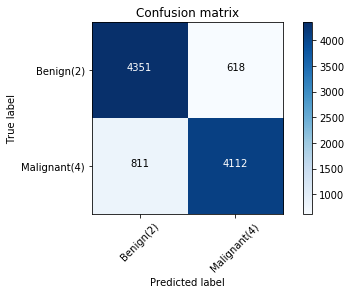

In [0]:
import numpy as np
# Calcula a Matriz de Confusão
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Exibe a Matriz de Confusão não-normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')